## Import Dependencies

In [4]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
albumentations               1.4.4
annotated-types              0.6.0
astunparse                   1.6.3
beautifulsoup4               4.12.3
certifi                      2024.2.2
charset-normalizer           3.3.2
coloredlogs                  15.0.1
contourpy                    1.2.1
cycler                       0.12.1
filelock                     3.13.4
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
gdown                        5.1.0
google-pasta                 0.2.0
grpcio                       1.62.2
h5py                         3.11.0
humanfriendly                10.0
idna                         3.7
imageio                      2.34.1
imgviz                       1.7.5
joblib                       1.4.0
keras                        3.3.2
kiwisolver                   1.4.5
labelme                      5.4.1
la

In [3]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

  Using cached labelme-5.4.1.tar.gz (1.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/14/60/12d4f27b859a74359306662da69c2d08826a2b05cfe7f96e66b490f41573/matplotlib-3.8.4-cp311-cp311-macos

In [2]:
%pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
Using cached tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl (227.0 MB)
Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
Note: you may need to restart the kernel to use updated packages.


### Process for Image collection run in capture_imgs.py

In [1]:
import os
import time
import uuid
import cv2

In [6]:
# IMAGES_PATH = os.path.join('data', 'images')
# number_images = 30

In [ ]:
#Mac can't run this in a jupyter cell so i've run it in capture_imgs.py
# cap = cv2.VideoCapture(1)
# for img in range(number_images):
#     print(f'Collecting image {img}')
#     ret, frame = cap.read()
#     imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

### Annotate Images using Labelme

In [7]:
!labelme

2024-04-25 13:06:35,045 [INFO   ] __init__:get_config:67- Loading config file from: /Users/darylroberts/.labelmerc


## Image loading to visualize the data

In [2]:
import tensorflow as tf
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

In [17]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)

In [18]:
images.as_numpy_iterator().next()

b'data/images/a6ecbff4-0328-11ef-9e09-2a3525595f90.jpg'

In [39]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [21]:
images = images.map(load_image)

In [22]:
images.as_numpy_iterator().next()

array([[[165, 155, 128],
        [168, 158, 131],
        [173, 163, 136],
        ...,
        [163, 157, 143],
        [148, 142, 128],
        [135, 129, 115]],

       [[170, 160, 133],
        [172, 162, 135],
        [175, 165, 138],
        ...,
        [164, 158, 144],
        [152, 146, 132],
        [142, 136, 122]],

       [[175, 165, 138],
        [176, 166, 139],
        [176, 166, 139],
        ...,
        [169, 163, 149],
        [163, 157, 143],
        [156, 150, 136]],

       ...,

       [[222, 215, 196],
        [221, 214, 195],
        [222, 215, 197],
        ...,
        [138, 116, 105],
        [135, 113, 102],
        [134, 112, 101]],

       [[216, 209, 190],
        [218, 211, 192],
        [221, 214, 195],
        ...,
        [136, 114, 103],
        [134, 112, 101],
        [133, 111, 100]],

       [[211, 204, 185],
        [215, 208, 189],
        [220, 213, 194],
        ...,
        [138, 116, 105],
        [137, 115, 104],
        [138, 116, 105]]

In [23]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [24]:
image_generator = images.batch(4).as_numpy_iterator()

In [55]:
plot_images = image_generator.next()

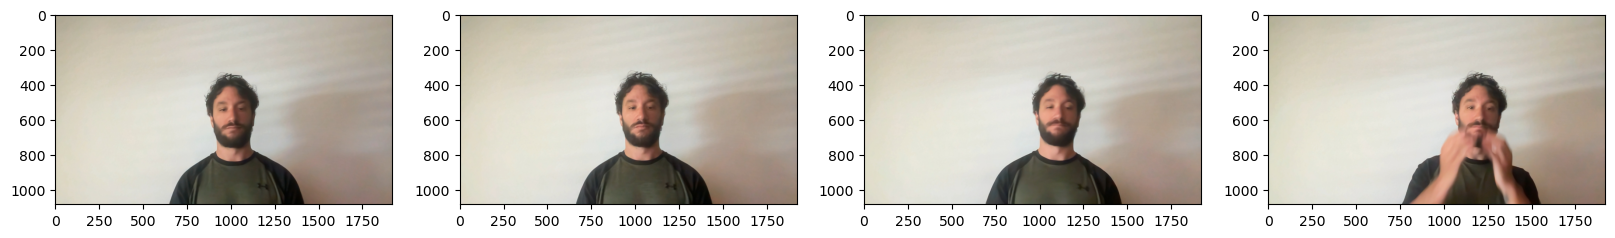

In [56]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

## Split data into train test and val sets

manually moved images to train test and val folders (63 in train, 14 in validation, 13 in test)

Now we need to take the matched labels and move them to the respective folder

In [57]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

## Build a data augmentation pipeline 

This will also augment the coordinates of the bounding boxes as to keep accurate coordinates after image has been augmented

In [3]:
import albumentations as alb

In [29]:
augmentor = alb.Compose([alb.RandomCrop(width=1013, height=1013),
                        alb.HorizontalFlip(p=0.5),
                        alb.RandomBrightnessContrast(p=0.2),
                        alb.RandomGamma(p=0.2),
                        alb.RGBShift(p=0.2),
                        alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                 label_fields=['class_labels']))

## Test augmentor on a single image

In [5]:
img = cv2.imread(os.path.join('data', 'train', 'images', 'a948a6a0-0328-11ef-9e09-2a3525595f90.jpg'))

In [6]:
with open(os.path.join('data', 'train', 'labels', 'a948a6a0-0328-11ef-9e09-2a3525595f90.json'), 'r') as f:
    label = json.load(f)

### Extract bounding box coordinates

In [11]:
label['shapes'][0]['points']

[[545.4651162790699, 241.74418604651163],
 [980.3488372093025, 827.7906976744185]]

In [13]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords

[545.4651162790699, 241.74418604651163, 980.3488372093025, 827.7906976744185]

### The "albumentations" format for our bbox params expects our coordinates to be normalized

We will get the height and width of the image then divide the bbox coordinates by those values to get the normalized coordinates

In [15]:
img.shape

(1080, 1920, 3)

In [16]:
coords = list(np.divide(coords, [1920,1080,1920,1080]))
coords

[0.28409641472868224,
 0.2238372093023256,
 0.5105983527131783,
 0.7664728682170542]

### Apply the augmentation to our one image

In [30]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [31]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [32]:
augmented['image'].shape

(1013, 1013, 3)

In [34]:
augmented['bboxes']

[(0.09423999632682122,
  0.2337060079432494,
  0.5235427810555798,
  0.8122316857595444)]

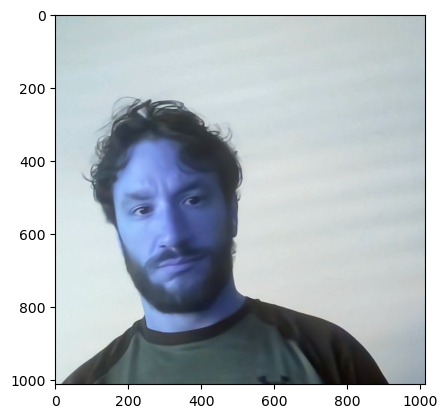

In [33]:
plt.imshow(augmented['image'])

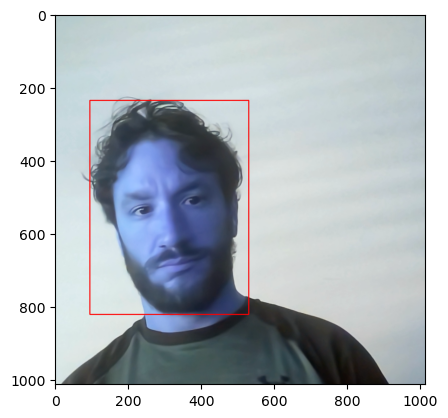

In [35]:
cv2.rectangle(augmented['image'],
             tuple(np.multiply(augmented['bboxes'][0][:2], [1013,1013]).astype(int)),
             tuple(np.multiply(augmented['bboxes'][0][2:], [1013,1013]).astype(int)),
             (255,0,0), 2)

plt.imshow(augmented['image'])

### Build the augmentation pipeline for the entire dataset

This pipeline will create 60 different augmented versions of each image so our 90 images will become 90 * 60 images

In [36]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))
   
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f"{image.split('.')[0]}.json")
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
                
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1920,1080,1920,1080]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f"{image.split('.')[0]}.{x}.jpg"), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1

                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0

                with open(os.path.join('aug_data', partition, 'labels', f"{image.split('.')[0]}.{x}.json"), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
image must be numpy array type
image must be numpy array type


## Load Augmented Images to a Tensorflow Dataset

In [40]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (270,270)))
train_images = train_images.map(lambda x: x/255)

In [41]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (270,270)))
test_images = test_images.map(lambda x: x/255)

In [42]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (270,270)))
val_images = val_images.map(lambda x: x/255)

## Prepare Labels

In [43]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding= 'utf-8') as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [44]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [45]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [46]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

## Combine the Label and Image Samples

In [47]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3720, 3720, 780, 780, 840, 840)

In [51]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(4000)
train = train.batch(8)
train = train.prefetch(4)

In [52]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1000)
test = test.batch(8)
test = test.prefetch(4)

In [53]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

### View a sample image with annotations

In [54]:
data_samples = train.as_numpy_iterator()

In [72]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


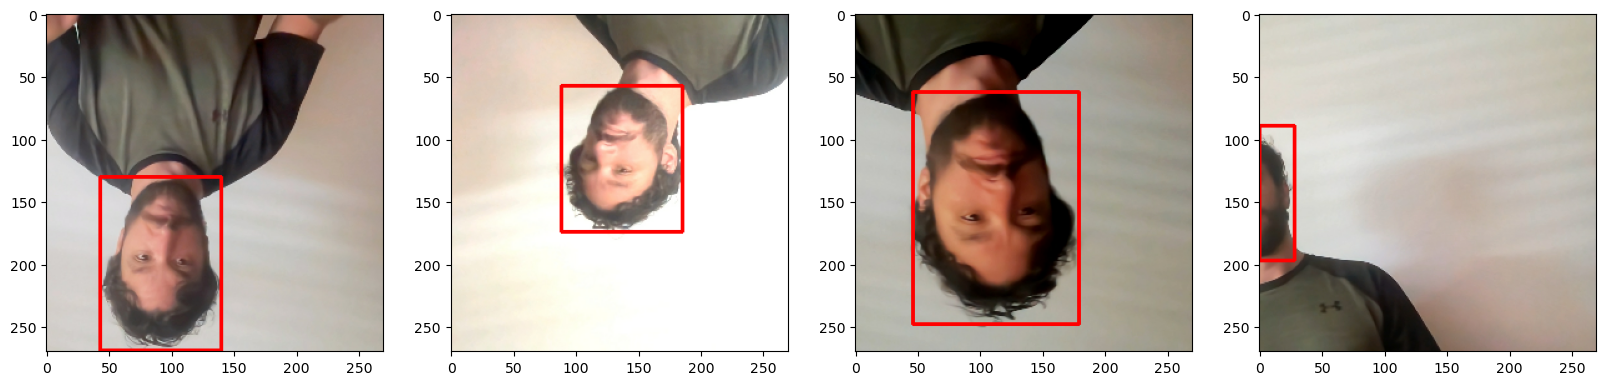

In [73]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = cv2.UMat(res[0][idx])
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                 tuple(np.multiply(sample_coords[:2], [270,270]).astype(int)),
                 tuple(np.multiply(sample_coords[2:], [270,270]).astype(int)),
                 (255,0,0), 2)

    sample_image_array = np.array(sample_image.get())
    ax[idx].imshow(sample_image_array.astype(float))

## Build the Deep Learning model

In [74]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [75]:
vgg = VGG16(include_top=False)

In [76]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [78]:
def build_model():
    inputs = Input(shape=(270,270,3))

    vgg = VGG16(include_top=False)(inputs)

    #Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    #Bounding Box Model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs, outputs=[class2, regress2])

    return facetracker

In [79]:
facetracker = build_model()
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 270, 270, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [80]:
X, y = train.as_numpy_iterator().next()

In [81]:
X.shape

(8, 270, 270, 3)

### Define the Loss and Optimizers

In [84]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [85]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [86]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))

    h_true = y_true[:,3] - y_true[:, 1]
    w_true = y_true[:,2] - yhat[:, 0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coord + delta_size

In [87]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

## Train the Neural Network

In [92]:
class FaceTracker(Model):
    def __init__(self, facetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            #This is how we get our predicted values per epoch
            classes, coords = self.model(X, training=True)

            #Get the loss for the class prediction y[0] is y_true and classes is y_pred
            batch_classloss = self.closs(y[0], classes)

            #Get the loss for the bounding box predictions (cast as a float) y[1] is y_true and coords is y_pred
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss + 0.5*batch_classloss

            #Using the loss we can find how the weights should be adjusted with the gradient descent values
            grad = tape.gradient(total_loss, self.model.trainable_variables)

        #Using the adam optimizer perform backpropagation with gradients    
        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {'total_loss':total_loss, 'class_loss':batch_classloss, 'regress_loss':batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_regressloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_regressloss+0.5*batch_classloss

        return {'total_loss': total_loss, 'class_loss':batch_classloss, 'regress_loss':batch_regressloss}


    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [103]:
model = FaceTracker(facetracker)
model.compile(opt, classloss, regressloss)

### Begin Training

In [104]:
history = model.fit(train, epochs=40, validation_data=val)

Epoch 1/40
465/465 [==============================] - 1157s 2s/step - total_loss: 0.2232 - class_loss: 0.0371 - regress_loss: 0.2046 - val_total_loss: 0.0813 - val_class_loss: 0.0042 - val_regress_loss: 0.0792
Epoch 2/40
465/465 [==============================] - 1164s 2s/step - total_loss: 0.0943 - class_loss: 0.0174 - regress_loss: 0.0856 - val_total_loss: 0.0357 - val_class_loss: 0.0034 - val_regress_loss: 0.0340
Epoch 3/40
465/465 [==============================] - 1160s 2s/step - total_loss: 0.1135 - class_loss: 0.0203 - regress_loss: 0.1034 - val_total_loss: 0.0941 - val_class_loss: 0.0043 - val_regress_loss: 0.0920
Epoch 4/40
465/465 [==============================] - 1102s 2s/step - total_loss: 0.0531 - class_loss: 0.0109 - regress_loss: 0.0476 - val_total_loss: 0.0331 - val_class_loss: 0.0010 - val_regress_loss: 0.0326
Epoch 5/40
465/465 [==============================] - 1096s 2s/step - total_loss: 0.0300 - class_loss: 0.0049 - regress_loss: 0.0276 - val_total_loss: 0.0439 - 

### Plot training performance

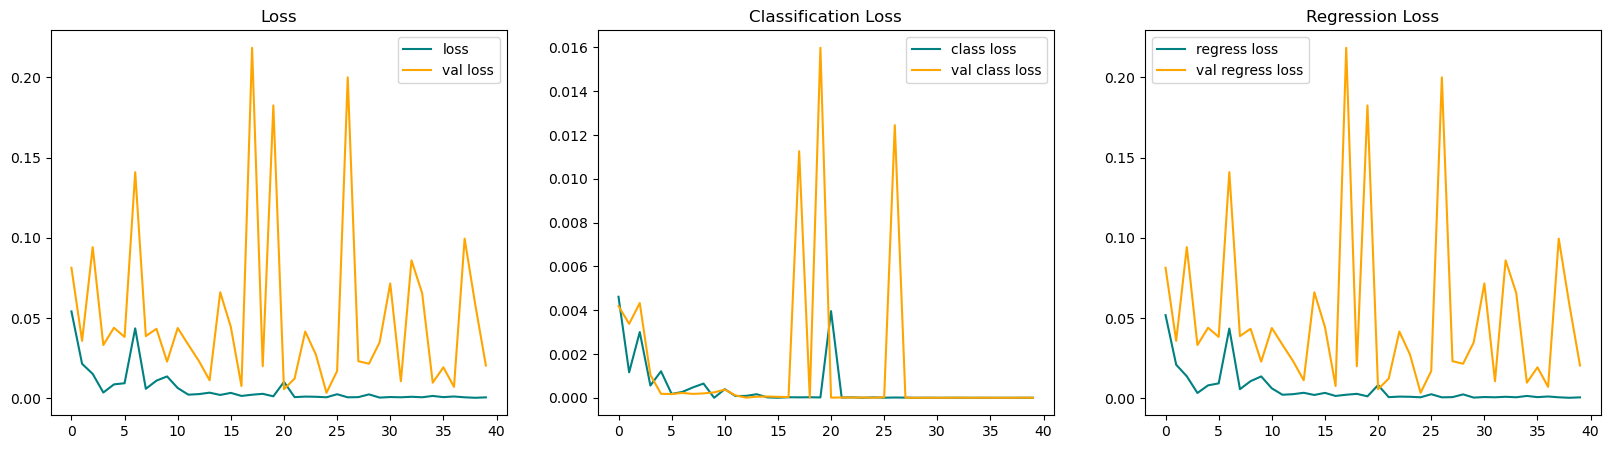

In [105]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history.history['total_loss'], color='teal', label='loss')
ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['class_loss'], color='teal', label='class loss')
ax[1].plot(history.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(history.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(history.history['val_total_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

## Make Predictions

In [106]:
test_data = test.as_numpy_iterator()

In [122]:
test_sample = test_data.next()

In [123]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 751ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


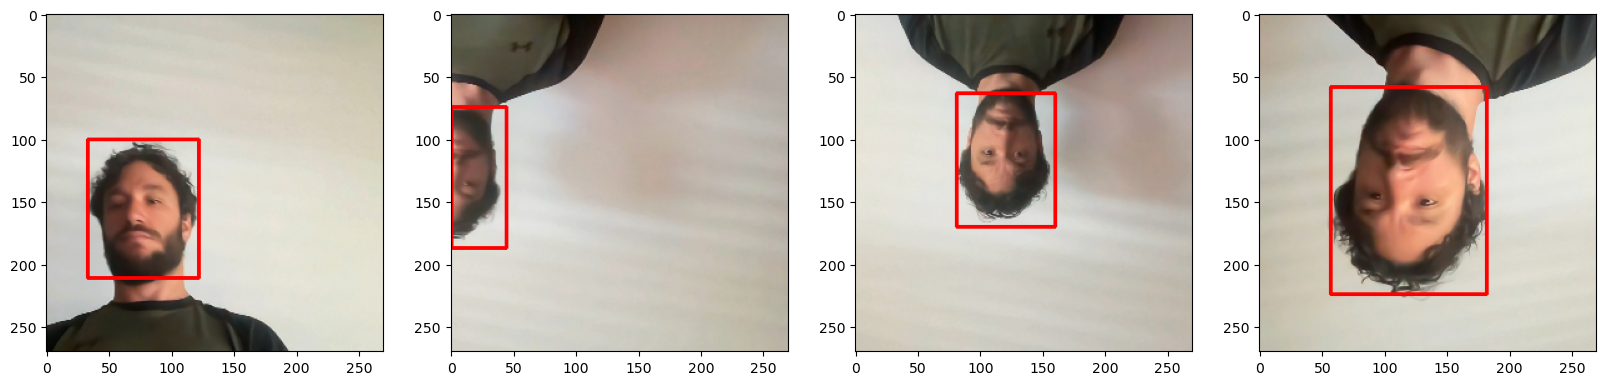

In [124]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = cv2.UMat(test_sample[0][idx])
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                     tuple(np.multiply(sample_coords[:2], [270,270]).astype(int)),
                     tuple(np.multiply(sample_coords[2:], [270,270]).astype(int)),
                     (255,0,0), 2)

    sample_image_array = np.array(sample_image.get())
    ax[idx].imshow(sample_image_array.astype(float))

### Save the model

In [3]:
from tensorflow.keras.models import load_model

In [132]:
facetracker.save('facetracker.keras')

## Real time detection

Real time detection done in real_time.py

In [ ]:
# facetracker = load_model('facetracker.keras')

# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     _, frame = cap.read()
#     frame = frame[112:1125, 112:1125, :]

#     rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     resized = tf.image.resize(rgb, (270,270))

#     yhat = facetracker.predict(np.expand_dims(resized/255, 0))
#     sample_coords = yhat[1][0]

#     if yhat[0] > 0.5:
#         cv2.rectangle(frame,
#                      tuple(np.multiply(sample_coords[:2], [1013,1013]).astype(int)),
#                      tuple(np.multiply(sample_coords[2:], [1013,1013]).astype(int)),
#                      (255,0,0), 2)

#         cv2.rectangle(frame,
#                      tuple(np.add(np.multiply(sample_coords[:2], [1013,1013]).astype(int),
#                                  [0,-30])),
#                      tuple(np.add(np.multiply(sample_coords[:2], [1013,1013]).astype(int),
#                                  [80,0])),
#                         (255,0,0), -1)

#         cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [1013,1013]).astype(int),
#                                                [0,-5])),
#                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

#     cv2.imshow('FaceTrack', frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

2024-05-01 08:49:47.807073: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-01 08:49:47.807100: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-01 08:49:47.807104: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-01 08:49:47.807138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-01 08:49:47.807162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-05-01 08:49:48.778 python[1475:19694] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraU